In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf
import os

# Data Cleaning-
Removing dodgy images

In [3]:
# for image processing
import cv2
# to check image type
import imghdr

In [4]:
data_dir = 'data' 

In [5]:
image_extns = ['jpeg','jpg', 'bmp', 'png']

In [6]:
dir = 'Violent Protest'

In [7]:
path = '/content/drive/MyDrive/Colab Notebooks/Project/Protest Classification/data'

In [8]:
# directory containg images folder
os.listdir(os.path.join(path))

['Non-Violent Protest ', 'Violent Protest']

In [9]:
# manually eliminated images with vector format and size less than 10KB

In [10]:
# reading the image in form of array
temp1 = cv2.imread(os.path.join(path,'Violent Protest', '0.98663700_1591350170_floyd.jpg'))
temp2 = cv2.imread(os.path.join(path,'Violent Protest', '01000000-0aff-0242-ac82-08db1d76864d_cx0_cy10_cw0_w1200_r1.jpg'))
temp1, temp2

(array([[[ 97, 126, 157],
         [ 94, 122, 153],
         [ 96, 121, 153],
         ...,
         [ 13,  11,  10],
         [ 14,  12,  11],
         [ 15,  13,  12]],
 
        [[ 95, 124, 155],
         [ 93, 121, 152],
         [ 97, 120, 152],
         ...,
         [ 13,  11,  10],
         [ 14,  12,  11],
         [ 15,  13,  12]],
 
        [[ 95, 123, 153],
         [ 93, 121, 151],
         [ 99, 123, 153],
         ...,
         [ 13,  11,  10],
         [ 14,  12,  11],
         [ 14,  12,  11]],
 
        ...,
 
        [[101, 113, 123],
         [103, 115, 125],
         [104, 116, 126],
         ...,
         [114, 126, 138],
         [113, 125, 137],
         [114, 126, 138]],
 
        [[102, 114, 124],
         [102, 114, 124],
         [103, 115, 125],
         ...,
         [110, 124, 136],
         [110, 124, 136],
         [113, 127, 139]],
 
        [[102, 114, 124],
         [102, 114, 124],
         [103, 115, 125],
         ...,
         [109, 123, 135],
  

In [11]:
# shape of image height = 674, width = 1024, and 3 channels(color image) 
temp1.shape,temp2.shape

((674, 1024, 3), (675, 1200, 3))

Since different images are of different size(shape of array). Need to convert them to a standard size(shape of array) during preprocessing

In [12]:
for image_class in os.listdir(path): 
    for image in os.listdir(os.path.join(path, image_class)):
        image_path = os.path.join(path, image_class, image)
        try: 
            img = cv2.imread(image_path)
            img_typ = imghdr.what(image_path)
            if img_typ not in image_extns:
                print('Image extension is {}.Thus, image not in extension list {}'.format(img_typ,image_path))
                os.remove(image_path) # deleting images which are of different file format
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Loading Data & Preprocessing data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [60]:
# Data Preprocessing - 
# Standardizing the size of all images to 256x256
# creating batch of 16 shuffled images
# creating a tuple (zip) having features and corresponding class of image (based on its folder)
data = tf.keras.utils.image_dataset_from_directory(batch_size = 16,directory=os.path.join(path),image_size=(256, 256), shuffle=True)

Found 312 files belonging to 2 classes.


In [61]:
data_iterator = data.as_numpy_iterator()

In [80]:
batch = data_iterator.next()

In [81]:
type(batch)

tuple

In [82]:
# shape of random image from a batch
batch[0][0].shape

(256, 256, 3)

In [83]:
# Size of batches of images and classes
len(batch[0]),len(batch[1])

(16, 16)

In [84]:
# batch[0][16]

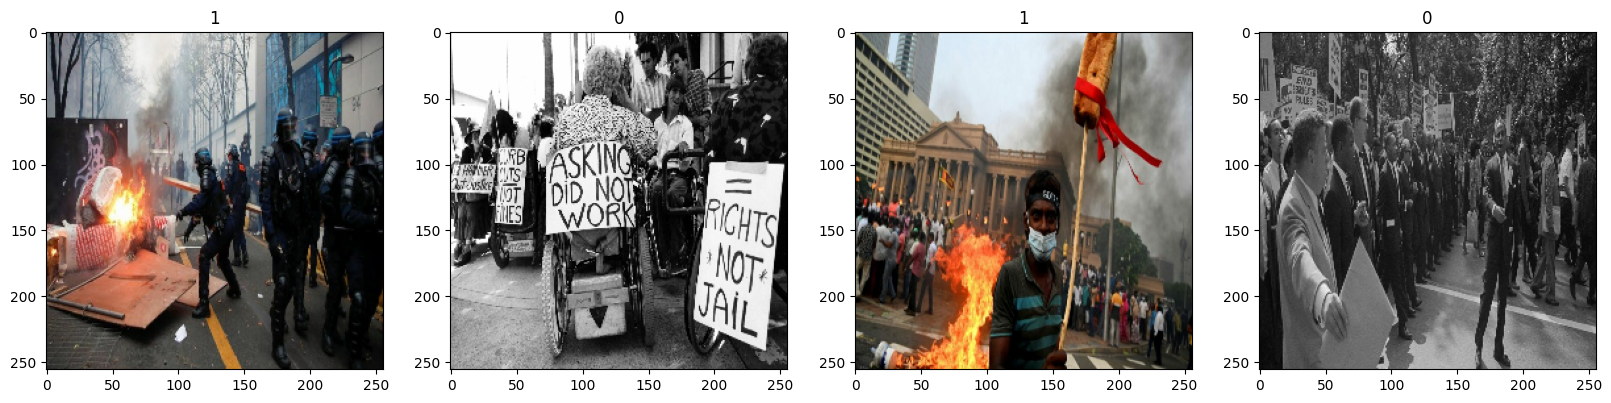

In [85]:
# loading images randomly
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for i, img in enumerate(batch[0][:4]):
  ax[i].imshow(img.astype(int))
  ax[i].title.set_text(batch[1][i])

In [86]:
batch

(array([[[[1.08599731e+02, 1.22005981e+02, 1.30412231e+02],
          [1.04404297e+02, 1.21404297e+02, 1.31404297e+02],
          [9.96389771e+01, 1.14576477e+02, 1.21607727e+02],
          ...,
          [1.05572266e+02, 1.05572266e+02, 1.05572266e+02],
          [1.02884766e+02, 1.02884766e+02, 1.02884766e+02],
          [9.93222656e+01, 9.93222656e+01, 9.93222656e+01]],
 
         [[1.13486694e+02, 1.26601746e+02, 1.35007996e+02],
          [1.12840393e+02, 1.27496643e+02, 1.38277893e+02],
          [1.03892456e+02, 1.18829956e+02, 1.25861206e+02],
          ...,
          [1.11867188e+02, 1.11867188e+02, 1.11867188e+02],
          [1.07746094e+02, 1.07746094e+02, 1.07746094e+02],
          [1.02777344e+02, 1.02777344e+02, 1.02777344e+02]],
 
         [[1.18851562e+02, 1.29267578e+02, 1.38535156e+02],
          [1.15313416e+02, 1.29313416e+02, 1.40313416e+02],
          [1.02173828e+02, 1.15361755e+02, 1.23254333e+02],
          ...,
          [1.13138672e+02, 1.13138672e+02, 1.1313

In [87]:
# scaling data 
data_scaled = data.map(lambda x,y: (x/255, y))
batch = data_scaled.as_numpy_iterator().next()
batch[0][0].max(),batch[0][0].min()

(1.0, 0.0)

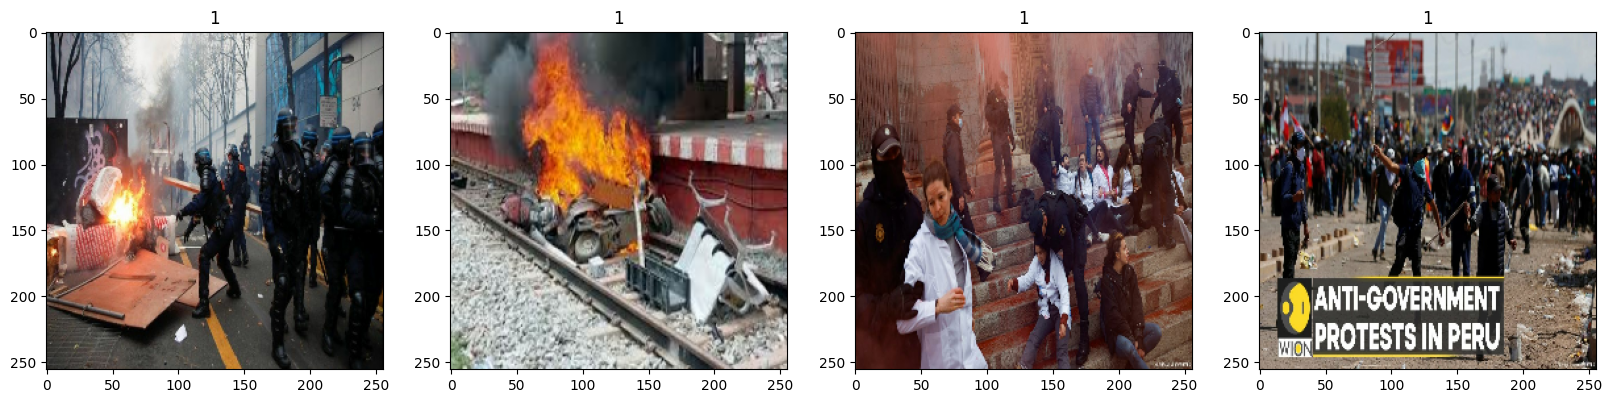

In [88]:
# loading scaled images randomly
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for i, img in enumerate(batch[0][:4]):
  ax[i].imshow(img)
  ax[i].title.set_text(batch[1][i])

# Spliting Data

In [89]:
len(data)

20

In [90]:
train_size = int(len(data)*0.7)
valid_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [91]:
train = data.take(train_size)
valid = data.skip(train_size).take(valid_size)
test = data.skip(train_size + valid_size).take(test_size)

# Build Model

In [92]:
# importing model and layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [93]:
model = Sequential()

In [94]:
# Adding first CNN and max pooling layer to model
model.add(Conv2D(16,(3,3),strides=(1,1),activation = 'relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Adding second CNN and max pooling layer to model
model.add(Conv2D(32,(3,3),strides=(1,1),activation = 'relu'))
model.add(MaxPooling2D())


# # Adding third CNN and max pooling layer to model - -> Not required
# model.add(Conv2D(16,(3,3),strides=(1,1),activation = 'relu'))
# model.add(MaxPooling2D())

model.add(Flatten()) # flattening layer to prepare it for dense layer 

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [95]:
model.compile(optimizer = 'adam', loss = tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [96]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 123008)            0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [97]:
logdir='logs'

In [98]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [99]:
hist = model.fit(train, epochs=10, validation_data=valid, callbacks=[tensorboard_callback])

Epoch 1/10
14/14 [==============================] - 40s 3s/step - loss: 442.8511 - accuracy: 0.4955 - val_loss: 46.3733 - val_accuracy: 0.6719
Epoch 2/10
14/14 [==============================] - 40s 3s/step - loss: 22.4305 - accuracy: 0.6830 - val_loss: 6.7872 - val_accuracy: 0.7344
Epoch 3/10
14/14 [==============================] - 53s 4s/step - loss: 2.9311 - accuracy: 0.8482 - val_loss: 1.6937 - val_accuracy: 0.8750
Epoch 4/10
14/14 [==============================] - 41s 3s/step - loss: 0.5165 - accuracy: 0.9464 - val_loss: 0.3128 - val_accuracy: 0.9844
Epoch 5/10
14/14 [==============================] - 50s 3s/step - loss: 0.6223 - accuracy: 0.9866 - val_loss: 0.3712 - val_accuracy: 0.9688
Epoch 6/10
14/14 [==============================] - 50s 3s/step - loss: 0.2178 - accuracy: 0.9732 - val_loss: 0.3906 - val_accuracy: 0.9375
Epoch 7/10
14/14 [==============================] - 40s 3s/step - loss: 0.1158 - accuracy: 0.9866 - val_loss: 0.0969 - val_accuracy: 0.9844
Epoch 8/10
14/14

# Plot performance

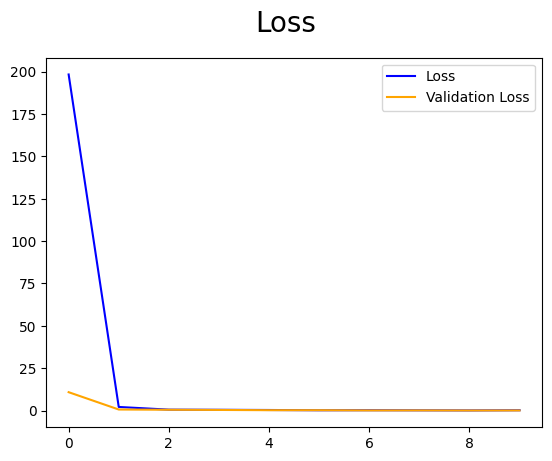

In [59]:
# Plotting model loss across iterations
plt.plot(hist.history['loss'],color='blue',label = 'Loss')
plt.plot(hist.history['val_loss'],color='orange',label = 'Validation Loss')
plt.suptitle('Loss',fontsize = 20)
plt.legend(loc = 'upper right')
plt.show()

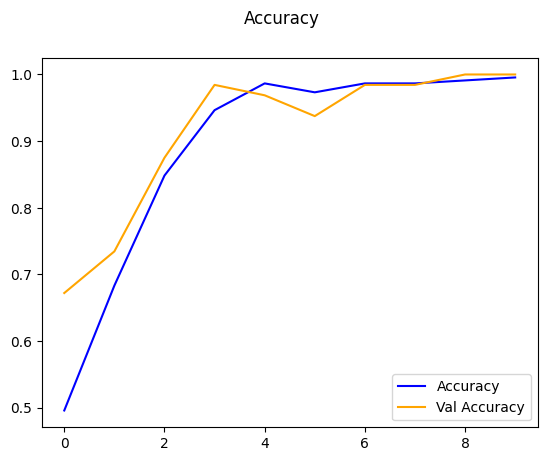

In [102]:
# Plotting model accuracy with each iteration
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'blue', label = 'Accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'Val Accuracy')
plt.suptitle('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Model Evaluation

In [103]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [106]:

prec = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [108]:
for batch in test.as_numpy_iterator():
  X, y = batch
  y_pred = model.predict(X)

  prec.update_state(y,y_pred)
  rec.update_state(y,y_pred)
  acc.update_state(y,y_pred)

1/1 [==============================] - 0s 238ms/step


In [109]:
print(f'Precision of test dataset is:{prec.result()}')
print(f'Recall of test dataset is:{rec.result()}')
print(f'Accuracy of test dataset is:{acc.result()}')

Precision of test dataset is:1.0
Recall of test dataset is:1.0
Accuracy of test dataset is:1.0


Lets check the model result on new random image.

Taking images of protest from 1900s

In [115]:
new_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Protest Classification/test_images/police-toss.jpg')

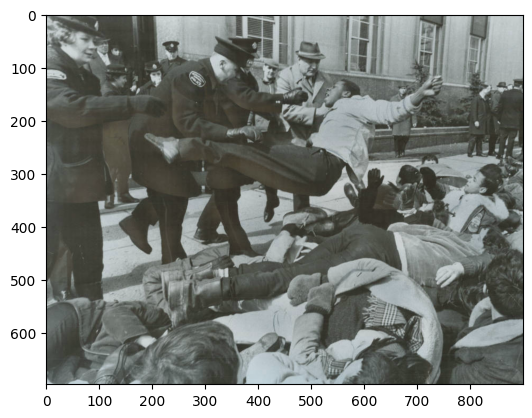

In [120]:
plt.imshow(new_img.astype(int))

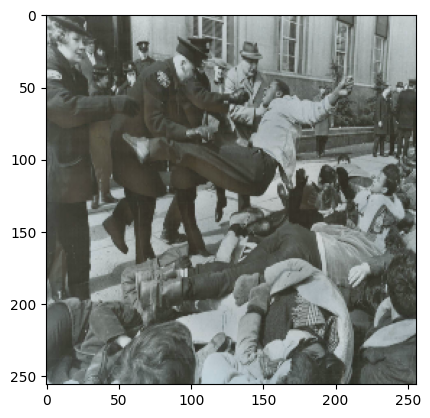

In [128]:
# resize image
resized_img = tf.image.resize(new_img,(256,256))
plt.imshow(resized_img.numpy().astype(int))

In [130]:
y_pred = model.predict(np.expand_dims(resized_img/255,0))

1/1 [==============================] - 0s 233ms/step


In [133]:
if y_pred>0.5:
  print('Image is of Violent Protest')
else:
  print('Image is of Non-Violent Protest')

Image is of Violent Protest


In [148]:
# Non-Violent check
new_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Protest Classification/test_images/ep08_01.jpg')

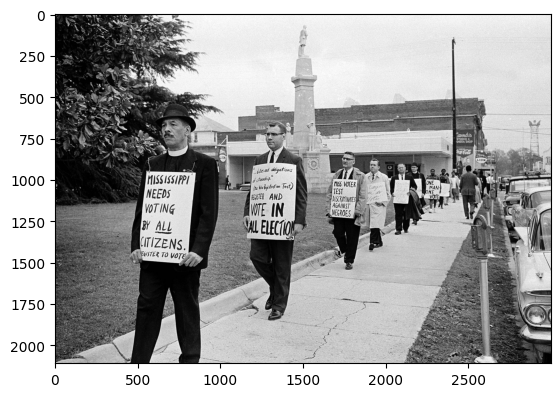

In [149]:
plt.imshow(new_img.astype(int))
plt.show()

In [151]:
# resizing image to size 256x256
resized_img = tf.image.resize(new_img,(256,256))

In [152]:
y_pred = model.predict(np.expand_dims(resized_img/255,0))

1/1 [==============================] - 0s 69ms/step


In [154]:
if y_pred>0.5:
  print('Image is of Violent Protest')
else:
  print('Image is of Non-Violent Protest')

Image is of Non-Violent Protest


 # Saving the Model

In [159]:
from tensorflow.keras.models import save_model,load_model

In [156]:
model.save('/content/drive/MyDrive/Colab Notebooks/Project/Protest Classification/model/protestclassifier.h5')

In [161]:
classifier = load_model('/content/drive/MyDrive/Colab Notebooks/Project/Protest Classification/model/protestclassifier.h5')

In [164]:
y_pred = classifier.predict(np.expand_dims(resized_img/255,0))

1/1 [==============================] - 0s 259ms/step


In [165]:
if y_pred>0.5:
  print('Image is of Violent Protest')
else:
  print('Image is of Non-Violent Protest')

Image is of Non-Violent Protest
